In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as px

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [57]:
pd.set_option('display.max_columns', None)

In [58]:
df = pd.read_csv('outlier_treated.csv').drop_duplicates()

In [59]:
df.head()

,PROP_ID,PROPERTY_TYPE,SOCIETY_NAME,CITY,location,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,PRICE,AGE,FACING,FURNISH,amenity_luxury,FLOOR_NUM,LATITUDE,LONGITUDE,PROP_NAME,TOTAL_FLOOR,FORMATTED_LANDMARK_DETAILS,DESCRIPTION
0,J71214794,flat,Bhawani Bandhan,Kolkata North,Madhyamgram,2.0,NaN,920,4239.0,0.39,Old Property,0,Unfurnished,NaN,1,22.690003,88.459080,Bhawani Bandhan,11.0,"['5 Religious Places', '15 Hospitals', '1 Attr...",Experience a new style of living with Bhawani ...
1,F70835394,flat,Ganguly 4Sight Desire,Kolkata South,Garia,1.0,NaN,535,5100.0,0.27,Old Property,0,Unfurnished,NaN,1,22.468780,88.380720,Ganguly 4Sight Desire,7.0,"['3 Metro Stations', '9 Religious Places', '3 ...",Let your dream of owning a flat come true with...
2,P69854924,flat,Dtc Capital City,Kolkata East,Rajarhat,4.0,NaN,1940,4742.0,0.92,Old Property,0,Unfurnished,NaN,1,22.562087,88.505528,DTC Capital City,20.0,"['1 Shopping', '1 Education', '1 Hospital', '1...","Book your 4 BHK apartment in DTC Capital City,..."
3,E69854912,flat,Dtc Capital City,Kolkata East,Rajarhat,2.0,NaN,910,4615.0,0.42,Old Property,0,Unfurnished,NaN,1,22.562087,88.505528,DTC Capital City,20.0,"['1 Shopping', '1 Education', '1 Hospital', '1...",Make DTC Capital City your next home. Book you...
4,R69167152,flat,Sai Sarovaar,Kolkata East,New Town,3.0,NaN,1163,4700.0,0.55,Old Property,0,Unfurnished,NaN,1,22.570830,88.483880,Sai Sarovaar,4.0,"['1 Metro Station', '1 Religious Place', '1 AT...",Book a spectacular property in Sai Sarovaar th...


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot(data, x=None, y=None, kde=True, scatterplot=True, histplot=True, barplot=False, kdeplot=True, lmplot=False, heatmap=True, boxplot=True, violinplot=False,
                 piechart=True, piechart_param=None, histplot_param=None, barplot_param=None, kdeplot_param=None, boxplot_param=None, violinplot_param=None,
                 plots_per_row=3, **kwargs):
    # Initialize plot counter and grid dimensions
    plot_types = {
        'scatterplot': scatterplot,
        'histplot': histplot,
        'barplot': barplot,
        'kdeplot': kdeplot,
        'heatmap': heatmap,
        'boxplot': boxplot,
        'violinplot': violinplot,
        'piechart': piechart
    }

    num_plots = sum(plot_types.values())
    if num_plots == 0 and not lmplot:
        print("No plots selected.")
        return
    
    if lmplot:
        num_plots += 1  
    
    n_cols = plots_per_row
    n_rows = int(np.ceil(num_plots / n_cols))
    
    
    fig_width = n_cols * 6  
    fig_height = n_rows * 6  
    
    if n_rows == 1:
        fig_height = 6  

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    axs = axs.flatten()  

    plot_index = 0

    # Scatterplot
    if scatterplot and y is not None:
        sns.scatterplot(data=data, x=x, y=y, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'size', 'style', 'palette', 'hue_order', 'hue_norm', 'sizes', 'size_order', 'size_norm', 'markers', 'style_order', 'legend']})
        axs[plot_index].set_title(f'Scatter Plot: {x} vs {y}')
        plot_index += 1

    # Histogram
    if histplot:
        if histplot_param is not None:
            sns.histplot(data=data, x=histplot_param, ax=axs[plot_index], kde=kde, bins=50, **{k: kwargs[k] for k in kwargs if k in ['hue', 'weights', 'stat', 'binwidth', 'range', 'discrete', 'cumulative', 'element', 'fill', 'shrink', 'color', 'palette']})
            axs[plot_index].set_title(f'Histogram: {histplot_param}')
        else:
            sns.histplot(data=data, x=x, ax=axs[plot_index], kde=kde, bins=50, **{k: kwargs[k] for k in kwargs if k in ['hue', 'weights', 'stat', 'binwidth', 'range', 'discrete', 'cumulative', 'element', 'fill', 'shrink', 'color', 'palette']})
            axs[plot_index].set_title(f'Histogram: {x}')            
        plot_index += 1

    # Barplot
    if barplot:
        if barplot_param is not None:
            sns.barplot(data=data, x=barplot_param, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'order', 'estimator', 'errorbar', 'ci', 'palette']})
            axs[plot_index].set_title(f'Bar Plot: {barplot_param}')
        else:
            sns.barplot(data=data, x=x, y=y, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'order', 'estimator', 'errorbar', 'ci', 'palette']})
            axs[plot_index].set_title(f'Bar Plot: {x} vs {y}')           
        plot_index += 1

    # KDE Plot
    if kdeplot:
        if kdeplot_param is not None:
            sns.kdeplot(data=data, x=kdeplot_param, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'palette', 'bw_method', 'cut', 'clip', 'fill', 'common_norm']})
            axs[plot_index].set_title(f'KDE Plot: {kdeplot_param}')  
        else:
            sns.kdeplot(data=data, x=x, y=y, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'palette', 'bw_method', 'cut', 'clip', 'fill', 'common_norm']})
            axs[plot_index].set_title(f'KDE Plot: {x} vs {y}')
        plot_index += 1

    # Heatmap
    if heatmap and x is not None and y is not None:
        corr = data[[x, y]].corr()  # Compute correlation matrix
        sns.heatmap(corr, annot=True, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['annot', 'cmap', 'center', 'robust', 'vmin', 'vmax', 'linewidths', 'linecolor', 'cbar', 'cbar_kws']})
        axs[plot_index].set_title(f'Heatmap: Correlation of {x} and {y}')
        plot_index += 1

    # Boxplot
    if boxplot:
        if boxplot_param is not None:
            sns.boxplot(data=data, x=boxplot_param, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'order', 'palette', 'saturation', 'width', 'dodge', 'fliersize', 'linewidth']})
            axs[plot_index].set_title(f'Box Plot: {boxplot_param}')
        else:
            sns.boxplot(data=data, x=x, y=y, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'order', 'palette', 'saturation', 'width', 'dodge', 'fliersize', 'linewidth']})
            axs[plot_index].set_title(f'Box Plot: {x} vs {y}')
        plot_index += 1

    # Violin Plot
    if violinplot:
        if violinplot_param is not None:
            sns.violinplot(data=data, x=violinplot_param, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'order', 'bw', 'cut', 'scale', 'scale_hue', 'gridsize', 'width', 'inner', 'split', 'dodge', 'saturation', 'palette', 'linewidth']})
            axs[plot_index].set_title(f'Violin Plot: {violinplot_param}')
        else:
            sns.violinplot(data=data, x=x, y=y, ax=axs[plot_index], **{k: kwargs[k] for k in kwargs if k in ['hue', 'order', 'bw', 'cut', 'scale', 'scale_hue', 'gridsize', 'width', 'inner', 'split', 'dodge', 'saturation', 'palette', 'linewidth']})
            axs[plot_index].set_title(f'Violin Plot: {x} vs {y}')
        plot_index += 1

    # Pie Chart
    if piechart and piechart_param is not None:
        pie_data = data[piechart_param].value_counts()
        axs[plot_index].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, **{k: kwargs[k] for k in kwargs if k in ['colors', 'explode', 'shadow', 'startangle', 'counterclock', 'pctdistance', 'labeldistance', 'radius', 'frame']})
        axs[plot_index].set_title(f'Pie Chart: {piechart_param}')
        plot_index += 1

    # Remove unused subplots
    for i in range(plot_index, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

    # LM Plot (Separate handling)
    if lmplot and x is not None and y is not None:
        g = sns.lmplot(data=data, x=x, y=y, **{k: kwargs[k] for k in kwargs if k in ['hue', 'col', 'row', 'palette', 'markers', 'sharex', 'sharey', 'height', 'aspect', 'legend', 'fit_reg']})
        g.set_axis_labels(x, y)
        g.fig.suptitle(f'LM Plot: {x} vs {y}', y=1.03)  
        plt.show()



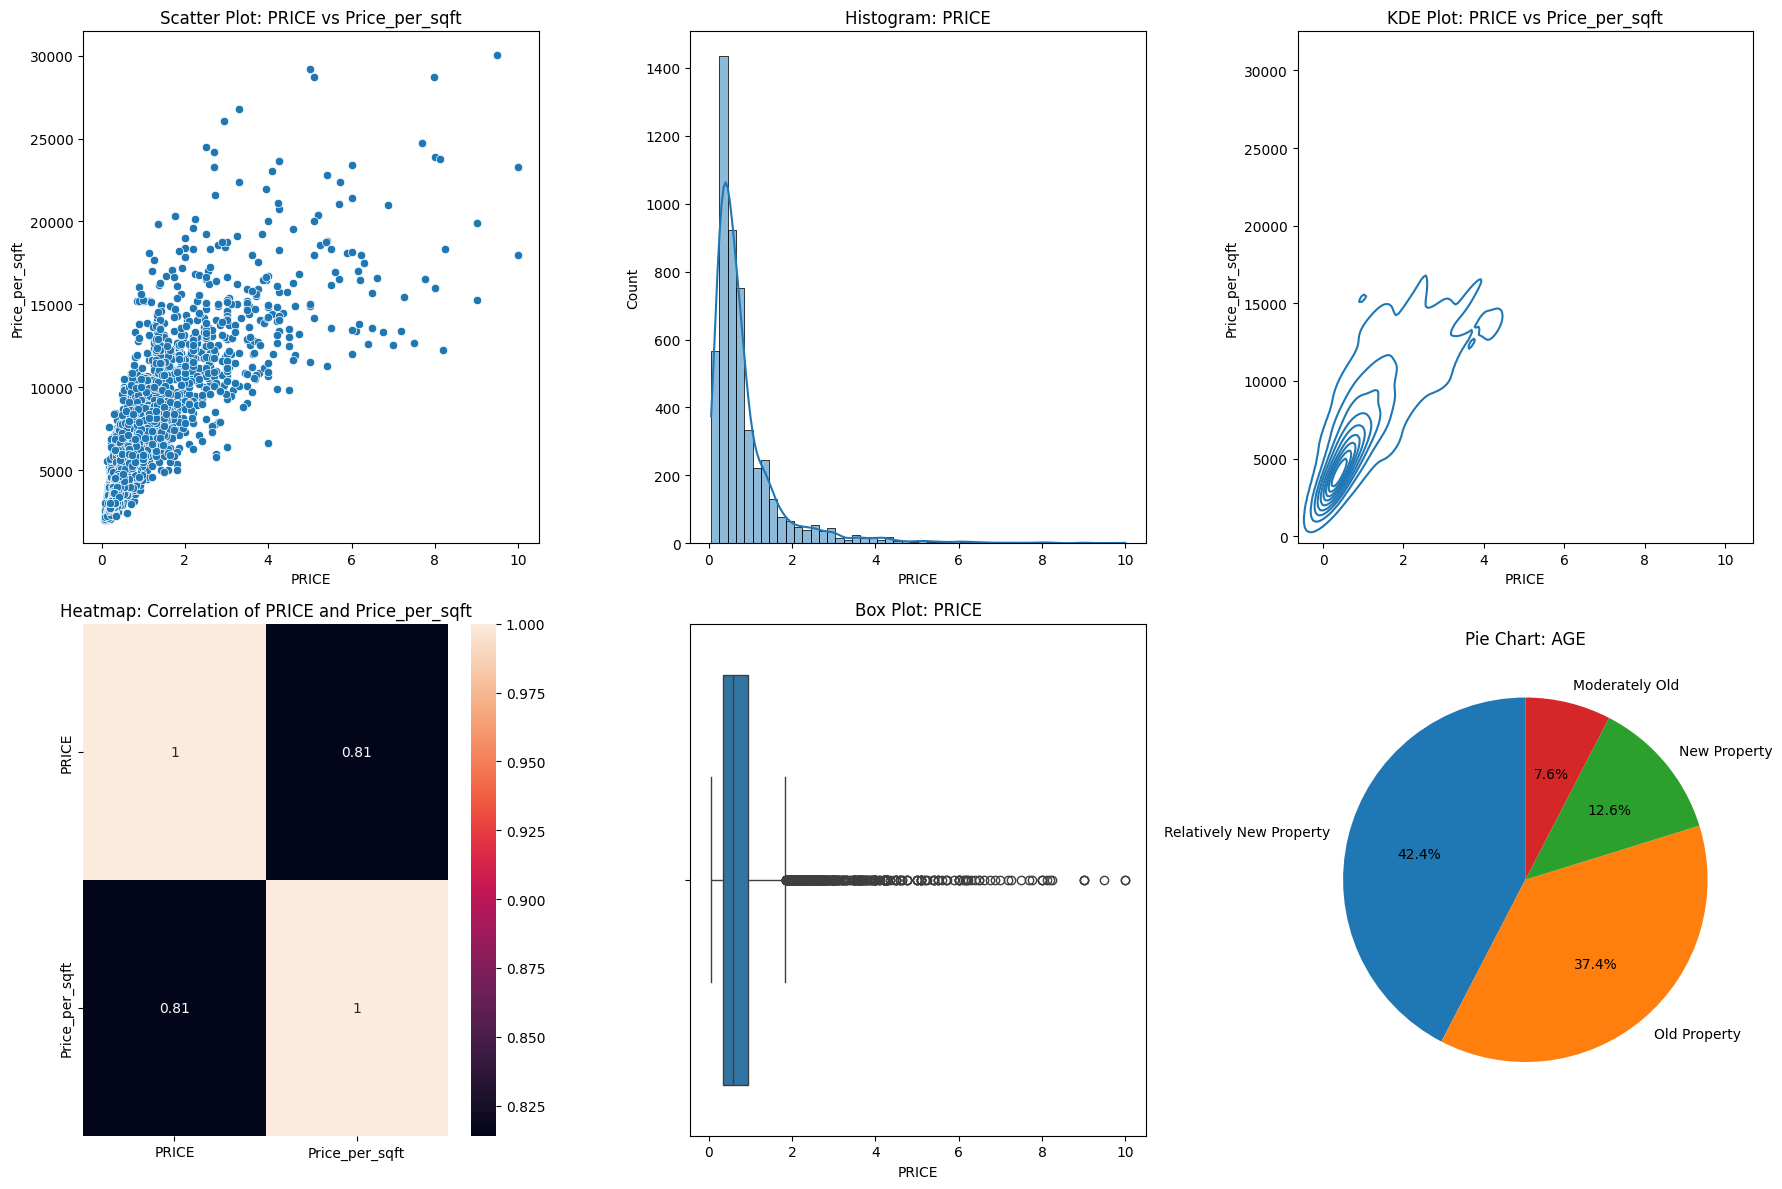

In [61]:
plot(df,x = 'PRICE', y = 'Price_per_sqft',piechart_param='AGE',boxplot_param='PRICE')

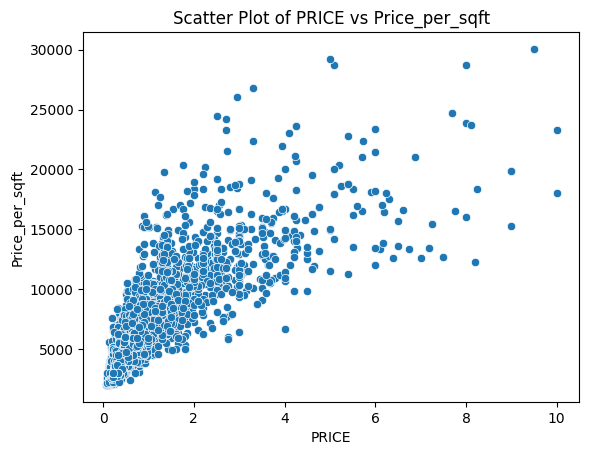

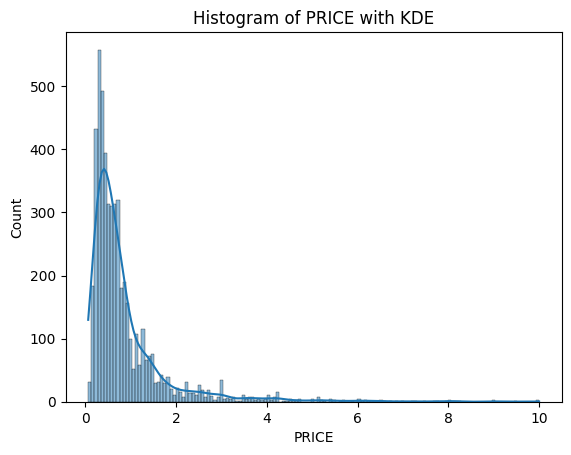

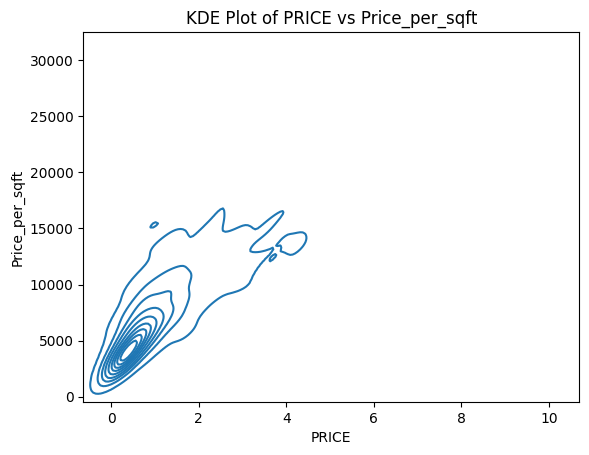

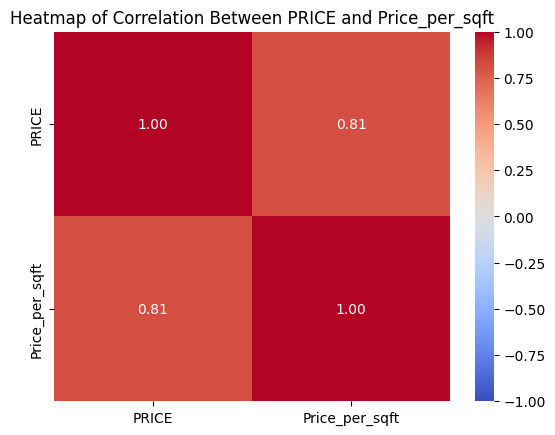

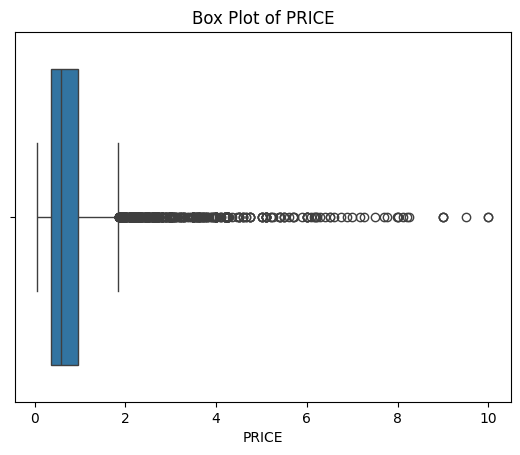

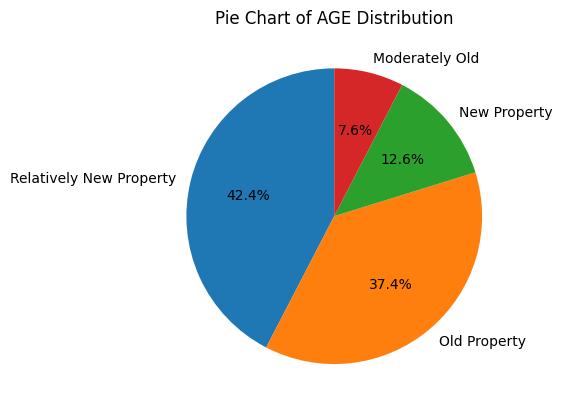

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Scatter Plot
sns.scatterplot(df, x='PRICE', y='Price_per_sqft')
plt.title('Scatter Plot of PRICE vs Price_per_sqft')
plt.show()

# Histogram with KDE
sns.histplot(df, x='PRICE', kde=True)
plt.title('Histogram of PRICE with KDE')
plt.show()

# KDE Plot
sns.kdeplot(df, x='PRICE', y='Price_per_sqft')
plt.title('KDE Plot of PRICE vs Price_per_sqft')
plt.show()

# Heatmap of Correlation
sns.heatmap(df[['PRICE', 'Price_per_sqft']].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Between PRICE and Price_per_sqft')
plt.show()

# Box Plot
sns.boxplot(df, x='PRICE')
plt.title('Box Plot of PRICE')
plt.show()

# Pie Chart
plt.pie(df['AGE'].value_counts(), labels=df['AGE'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of AGE Distribution')
plt.show()


In [63]:
df.shape

(5148, 21)

In [64]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                  653
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
PROP_NAME                      80
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64

In [65]:
df[df['PROP_NAME'] == 'On Request'].shape

(205, 21)

In [66]:
my_list = []
for i in df['PROP_NAME'].dropna():  # Drop NaN values to avoid errors
    my_list.append(i)

#print(set(my_list))


In [67]:
# 'kartick villa. sheth bagan.dumdum.','sadhanalay appartment Rajarhat', 
# 'standalone building New alipur', 'standalone building New alipur',

df['PROP_NAME'].replace({
    'kartick villa. sheth bagan.dumdum.': 'kartick villa',
    'standalone building New alipur': 'standalone',
    'sadhanalay appartment Rajarhat': 'sadhanalay',
}, inplace=True)


C:\Users\dipan\AppData\Local\Temp\ipykernel_14692\2929504547.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PROP_NAME'].replace({


In [68]:
values_to_replace_prop_name = ['7no tank area', 'sga', 'jhcff',  'skfjad', 'onrequest', 'sdfg', 'EEFEF', 
                               'sdjvneiuvqe', '67y87gytg', 'skfjad',
                               'ksjd', 'on reques', 'on requezt', 'bstation1','fvvfv', 'fgegweg', 'rtthth', 'skfjad','jodh1',
                                'new residential','new project', 'new booking', 
                               'on request', 'on request', 'sdjvneiuvqe', 'fvvfv','gari1', 'ksjd',
                               'gari1', 'kali', 'ksjd', 'skfjad', 'Flat', 'Residential', 'Apartments', 'Complex','Building', 
                               'Housing','Society', 'New Project', 'New Booking', 'New Residential', 
                               'Residential Apartment', 'Residential Apartment',
                               'New Booking', 'Residential', 'Society', 'Private','on reuest', 'on requezt', 'new residential', 
                                'new booking', 'new project', 'no name', 'not avaiable', 'nul', 'sdifwiu', 'on requested',
                               'dream 1', 'on request(new booking)','dream005',  'eudhwewef', 'not found', 'skfjad',
                               'on request (New Booking)', 'on request( New Booking )','on reuest', 'on requezt', 'no name',
                               'not avaiable', 'nul', 'sdifwiu', 'on requested','on request(new booking)', 
                               'dream005', 'eudhwewef', 'not found', 'skfjad', 'on request (New Booking)',
                               'on request( New Booking )', 'standalo', 'cb market',
                               'sdsvsdv', 'not applicable', 'on', 'not found',
                               'on requst', 'on rrq', 'on requ', 'on requst', 'on request(Ready flat)', 'on request', 
                               'on requst',  'nagerbazar', 
                               'residential Apartment',  'semi complex', 'Nul']
values_to_replace_prop_name = set(values_to_replace_prop_name)


In [69]:
df['PROP_NAME'] = df['PROP_NAME'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['PROP_NAME'] = df['PROP_NAME'].apply(lambda x: np.nan if x in values_to_replace_prop_name else x)
df['PROP_NAME'] = df['PROP_NAME'].str.capitalize()

In [70]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                  653
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
PROP_NAME                     428
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64

In [71]:
my_list = []
for i in df['SOCIETY_NAME'].dropna():  
    my_list.append(i)

#print(set(my_list))

In [72]:
#  'Standalone Apartment, Em Bypass','Standalone Apartment, Selimpore',
#'Suriya Apartment, Boral','Tansam Apartment 08-592( Individual)',
df['SOCIETY_NAME'].replace({
    'Standalone Apartment, Em Bypass': 'Standalone',
    'Standalone Apartment, Selimpore': 'Standalone',
    'Suriya Apartment, Boral': 'Suriya',
    'Tansam Apartment 08-592( Individual)': 'Tansam'
}, inplace=True)


C:\Users\dipan\AppData\Local\Temp\ipykernel_14692\679433142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SOCIETY_NAME'].replace({


In [73]:
values_to_relace_society_name = [
    'On', 'Na', 'On Req', 'On Request Ab20', 'On Request(Ready Flat)', 'On Request(New Booking)', 'New Residential',
    'Private', 'Complex', 'Individual', 'Residential Complex', 'Society',
    'Standalo',  
     'Standalone Apartment, Selimpore', 'Standalone Building, Jairampur Post Office',
    'On Request(New Booking)', 'On Request', 'New Booking', 'New Apartment', 'New Booking', 'New Residential', 'New Project',
    'On Request', 'New Residential', 'New Booking', 'New Booking', 'New Residential', 'On Request', 'New Residential',
    'New Booking', 'On Request(Ready Flat)', 'On Request', 'New Residential', 'New Booking', 'New Booking',
    'New Booking', 'On Request', 'New Residential', 'New Booking', 'On Request(New Booking)', 'New Booking', 'New Project',
    'New Booking', 'On Request', 'New Booking', 'New Booking', 'New Residential', 'New Booking', 'On Request',
    'On Request', 'On Request', 'On Request(New Booking)', 'On Request','6Rjh', '67Y87Gytg', 'Sdkjasdv', 'Sdsvsdv',
    '622G6Ded', 'Fgegweg', 'Eudhwewef', 'Fvvad',
    'Eefef', 'Sdjvneiuvqe', 'Sdifwiu', 'Sdifwiu', 
    'On Re', 'On Request ( New Booking)', 'On Re', 'On Request ( New Booking)', 'Fvvfv', 'Ksmvk', 'Ksmvk',
     'Fvvfv', 'Jora1', 'Fvvfv', 'Ksmvk',
    'Ksmvk', 'Ksmvk', 'On Requst', 'On Request (New Booking)', 'On Request', 'On Requst', 'On Request (New Booking)',
    'On Requst', 'On Request ( New Booking)', 'Ksmvk', 'On Request', 'Ksmvk', 'On Requst'
]
values_to_relace_society_name =set(values_to_replace_prop_name)

In [74]:
df['SOCIETY_NAME'] = df['SOCIETY_NAME'].apply(lambda x: np.nan if x in values_to_relace_society_name else x)
df['SOCIETY_NAME'] = df['SOCIETY_NAME'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['SOCIETY_NAME'] = df['SOCIETY_NAME'].str.capitalize()

In [75]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                  728
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
PROP_NAME                     428
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64

In [76]:
df[pd.isna(df['PROP_NAME']) & pd.notna(df['SOCIETY_NAME'])]


,PROP_ID,PROPERTY_TYPE,SOCIETY_NAME,CITY,location,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,PRICE,AGE,FACING,FURNISH,amenity_luxury,FLOOR_NUM,LATITUDE,LONGITUDE,PROP_NAME,TOTAL_FLOOR,FORMATTED_LANDMARK_DETAILS,DESCRIPTION
1470,E70806590,flat,Cb market,Kolkata East,Action Area 1,3.0,1.0,1420,6126.0,0.87,Old Property,0,Fully furnished,85.0,1,22.581047,88.462231,NaN,4.0,"['2 Metro Stations', '1 Religious Place', '4 A...",This lovely 3 bhk apartment/flat in new town a...
1474,T70699124,flat,7no tank area,Kolkata East,Action Area 1,3.0,1.0,1485,5723.0,0.85,Old Property,0,Luxury furnished,146.0,1,22.581047,88.462231,NaN,4.0,"['1 Metro Station', '1 Religious Place', '4 AT...",Looking for a 3 bhk property for sale in kolka...
1491,Y71253842,flat,On rrq,Kolkata North,Kanchrapara,2.0,1.0,740,2700.0,0.20,Old Property,7,Fully furnished,229.0,1,22.947183,88.437510,NaN,4.0,"['2 ATMs', '1 Hospital', '2 Pharmacys', '1 Bus...",This lovely 2 bhk apartment/flat in kanchrapar...
1493,W71251332,flat,On,Kolkata North,Kalyani,3.0,1.0,1080,4444.0,0.48,Relatively New Property,2,Fully furnished,229.0,2,22.566956,88.325134,NaN,4.0,"['4 Religious Places', '4 ATMs', '15 Hospitals...",On is one of kolkata north's most sought after...
1524,G71230172,flat,Standalo,Kolkata North,Satgachi,2.0,1.0,847,3896.0,0.33,Relatively New Property,7,Luxury furnished,149.0,1,22.615397,88.418691,NaN,5.0,"['2 Religious Places', '8 ATMs', '23 Hospitals...","This beautiful 2 bhk flat in satgachi, kolkata..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,D69541990,flat,On requested,Kolkata North,Jyangra,2.0,1.0,810,2992.0,0.24,Relatively New Property,2,Fully furnished,271.0,1,22.614432,88.440295,NaN,5.0,"['7 ATMs', '19 Hospitals', '1 Attraction', '2 ...","This 2 bhk flat is located in on requested, wh..."
4476,V64982102,flat,Nagerbazar,Kolkata North,Nager Bazar,3.0,1.0,990,4100.0,0.41,Old Property,0,Fully furnished,129.0,2,22.617476,88.416304,NaN,5.0,"['2 Religious Places', '8 ATMs', '23 Hospitals...",This 3 bhk apartment is available for sale in ...
4656,H68794482,flat,On requezt,Kolkata East,New Town,3.0,2.0,1483,4989.0,0.74,Old Property,2,Fully furnished,246.0,4,22.622898,88.452060,NaN,4.0,"['5 Religious Places', '5 ATMs', '15 Hospitals...",A 3 bhk flat is available for sale in kolkata ...
4659,Q68794734,flat,On requezt,Kolkata East,New Town,3.0,1.0,1250,5600.0,0.70,Relatively New Property,1,Fully furnished,246.0,3,22.623108,88.448420,NaN,4.0,"['2 Religious Places', '7 ATMs', '15 Hospitals...",This is unfurnished 3 bhk flat for sale in new...


In [77]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'SOCIETY_NAME', 'CITY', 'location',
       'BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'AGE',
       'FACING', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM', 'LATITUDE',
       'LONGITUDE', 'PROP_NAME', 'TOTAL_FLOOR', 'FORMATTED_LANDMARK_DETAILS',
       'DESCRIPTION'],
      dtype='object')

In [78]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                  728
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
PROP_NAME                     428
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64

# Filling Society name

In [79]:
def extract_society_details(df):

    society_details = {}
    prop_name_details = {}

    for index, row in df.iterrows():
        society_name = row['SOCIETY_NAME']
        prop_name = row['PROP_NAME']
        location = row['location']
        

        if pd.notna(society_name) and pd.notna(prop_name) and pd.notna(location):
            society_details[society_name] = [prop_name, location]

        if pd.notna(prop_name) and pd.notna(society_name) and pd.notna(location):
            prop_name_details[(prop_name, location)] = society_name

    return society_details, prop_name_details


society_details, prop_name_details = extract_society_details(df)

def fill_missing_prop_name(row, society_details):

    if pd.isna(row['PROP_NAME']) and pd.notna(row['SOCIETY_NAME']):
        society_name = row['SOCIETY_NAME']
        if society_name in society_details:
            if society_details[society_name][1] == row['location']:
                return society_details[society_name][0]
    return row['PROP_NAME']

def fill_missing_society_name(row, prop_name_details):

    if pd.isna(row['SOCIETY_NAME']) and pd.notna(row['PROP_NAME']) and pd.notna(row['location']):
        prop_name = row['PROP_NAME']
        location = row['location']
        if (prop_name, location) in prop_name_details:
            return prop_name_details[(prop_name, location)]
    return row['SOCIETY_NAME']


df['PROP_NAME'] = df.apply(fill_missing_prop_name, axis=1, society_details=society_details)


df['SOCIETY_NAME'] = df.apply(fill_missing_society_name, axis=1, prop_name_details=prop_name_details)



df.isnull().sum()


PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                  728
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
PROP_NAME                     427
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64

In [80]:


def extract_society_and_prop_details(df):
    
    society_to_details = {}
    prop_to_details = {}
    
    for index, row in df.iterrows():
        society_name = row['SOCIETY_NAME']
        prop_name = row['PROP_NAME']
        location = row['location']
        
        # Fill society_to_details dictionary
        if pd.notna(society_name) and pd.notna(prop_name) and pd.notna(location):
            society_to_details[society_name] = [prop_name, location]

        # Fill prop_to_details dictionary
        if pd.notna(prop_name) and pd.notna(society_name) and pd.notna(location):
            prop_to_details[(prop_name, location)] = society_name

    return society_to_details, prop_to_details

# Extract details while ignoring NaN values
society_to_details, prop_to_details = extract_society_and_prop_details(df)

def fill_missing_prop_name(row, society_to_details):
    # Check if PROP_NAME is missing and SOCIETY_NAME exists
    if pd.isna(row['PROP_NAME']) and pd.notna(row['SOCIETY_NAME']):
        society_name = row['SOCIETY_NAME']
        # Check if the SOCIETY_NAME exists in the dictionary and location matches
        if society_name in society_to_details:
            prop_name, location = society_to_details[society_name]
            if row['location'] == location:
                return prop_name
    return row['PROP_NAME']

def fill_missing_society_name(row, prop_to_details):
    # Check if SOCIETY_NAME is missing and PROP_NAME and location exist
    if pd.isna(row['SOCIETY_NAME']) and pd.notna(row['PROP_NAME']) and pd.notna(row['location']):
        prop_name = row['PROP_NAME']
        location = row['location']
        # Check if the PROP_NAME and location combination exists in the dictionary
        if (prop_name, location) in prop_to_details:
            return prop_to_details[(prop_name, location)]
    return row['SOCIETY_NAME']

# Apply functions to fill missing PROP_NAME and SOCIETY_NAME
df['PROP_NAME'] = df.apply(fill_missing_prop_name, axis=1, society_to_details=society_to_details)
df['SOCIETY_NAME'] = df.apply(fill_missing_society_name, axis=1, prop_to_details=prop_to_details)

# Check the results
print(df.isna().sum())


PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                  728
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
PROP_NAME                     427
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64


In [81]:
df[(df['SOCIETY_NAME'].isna()) & (df['PROP_NAME'].isna())].shape

(352, 21)

In [82]:
def fil_prop(row):
    if pd.isna(row['SOCIETY_NAME']) and pd.notna(row['PROP_NAME']):
        row['SOCIETY_NAME'] = row['PROP_NAME']
    elif pd.isna(row['PROP_NAME']) and pd.notna(row['SOCIETY_NAME']):
        row['PROP_NAME'] = row['SOCIETY_NAME']
    return row

df = df.apply(fil_prop, axis=1)


In [83]:
df.isna().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                  352
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
PROP_NAME                     352
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64

In [84]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'SOCIETY_NAME', 'CITY', 'location',
       'BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'AGE',
       'FACING', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM', 'LATITUDE',
       'LONGITUDE', 'PROP_NAME', 'TOTAL_FLOOR', 'FORMATTED_LANDMARK_DETAILS',
       'DESCRIPTION'],
      dtype='object')

In [85]:
df.drop(columns='PROP_NAME', inplace=True)

In [86]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'SOCIETY_NAME', 'CITY', 'location',
       'BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'AGE',
       'FACING', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM', 'LATITUDE',
       'LONGITUDE', 'TOTAL_FLOOR', 'FORMATTED_LANDMARK_DETAILS',
       'DESCRIPTION'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROP_ID                     5148 non-null   object 
 1   PROPERTY_TYPE               5148 non-null   object 
 2   SOCIETY_NAME                4796 non-null   object 
 3   CITY                        5148 non-null   object 
 4   location                    5148 non-null   object 
 5   BEDROOM_NUM                 5148 non-null   float64
 6   BALCONY_NUM                 4676 non-null   float64
 7   AREA                        5148 non-null   int64  
 8   Price_per_sqft              5148 non-null   float64
 9   PRICE                       5148 non-null   float64
 10  AGE                         5148 non-null   object 
 11  FACING                      5148 non-null   int64  
 12  FURNISH                     5148 non-null   object 
 13  amenity_luxury              4486 

In [88]:


try:

    new_df = df[(
        df['BEDROOM_NUM'].notna() &
        df['BALCONY_NUM'].notna() &
        df['AREA'].notna() &
        df['Price_per_sqft'].notna() &
        df['PRICE'].notna() &
        df['AGE'].notna() &
        df['SOCIETY_NAME'].notna() &
        df['amenity_luxury'].notna() &
        df['TOTAL_FLOOR'].notna()
    )]
    
 
    features = ['location', 'BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'AGE', 'amenity_luxury', 'TOTAL_FLOOR']
    X = new_df[features]
    y = new_df['SOCIETY_NAME']
    

    label_encoders = {}
    for col in ['location', 'AGE']:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    scaler = StandardScaler()
    X[['BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'amenity_luxury', 'TOTAL_FLOOR']] = scaler.fit_transform(
        X[['BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'amenity_luxury', 'TOTAL_FLOOR']]
    )
    

    pipeline = Pipeline(steps=[
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    

    pipeline.fit(X_train, y_train)

    df_missing = df[(
        df['BEDROOM_NUM'].notna() &
        df['BALCONY_NUM'].notna() &
        df['AREA'].notna() &
        df['Price_per_sqft'].notna() &
        df['PRICE'].notna() &
        df['AGE'].notna() &
        df['SOCIETY_NAME'].isna() &
        df['amenity_luxury'].notna() &
        df['TOTAL_FLOOR'].notna()
    )]
    
    X_missing = df_missing[features]
    

    for col in ['location', 'AGE']:
        X_missing[col] = label_encoders[col].transform(X_missing[col])
    

    X_missing[['BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'amenity_luxury', 'TOTAL_FLOOR']] = scaler.transform(
        X_missing[['BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'amenity_luxury', 'TOTAL_FLOOR']]
    )

    predictions = pipeline.predict(X_missing)

    assert len(predictions) == df_missing.shape[0], "Length mismatch between predictions and missing SOCIETY_NAME rows."

    predicted_society_names = label_encoder.inverse_transform(predictions)

    df.loc[df['SOCIETY_NAME'].isna(), 'SOCIETY_NAME'] = predicted_society_names
    

    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

except Exception as e:
    print(f"An error occurred: {e}")


C:\Users\dipan\AppData\Local\Temp\ipykernel_14692\383216175.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\dipan\AppData\Local\Temp\ipykernel_14692\383216175.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\dipan\AppData\Local\Temp\ipykernel_14692\383216175.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

An error occurred: y contains previously unseen labels: 'Srirampur'


In [89]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'SOCIETY_NAME', 'CITY', 'location',
       'BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'AGE',
       'FACING', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM', 'LATITUDE',
       'LONGITUDE', 'TOTAL_FLOOR', 'FORMATTED_LANDMARK_DETAILS',
       'DESCRIPTION'],
      dtype='object')

In [90]:
# No methods are effectively fill the data, thats why filling them as Unknown
df['SOCIETY_NAME'] = df['SOCIETY_NAME'].apply(lambda x: 'Unknown' if pd.isna(x) else x)

In [91]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                    0
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS    158
DESCRIPTION                     0
dtype: int64

# filling FORMATTED_LANDMARK_DETAILS

In [92]:
df['FORMATTED_LANDMARK_DETAILS'] = df['FORMATTED_LANDMARK_DETAILS'].apply(lambda x: ['Unknown'] if pd.isna(x) else x)

In [93]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                    0
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS      0
DESCRIPTION                     0
dtype: int64

In [94]:
662/df[~pd.isna(df['amenity_luxury'])].shape[0]*100
# there are 14% missing amenity_luxury

14.75702184574231

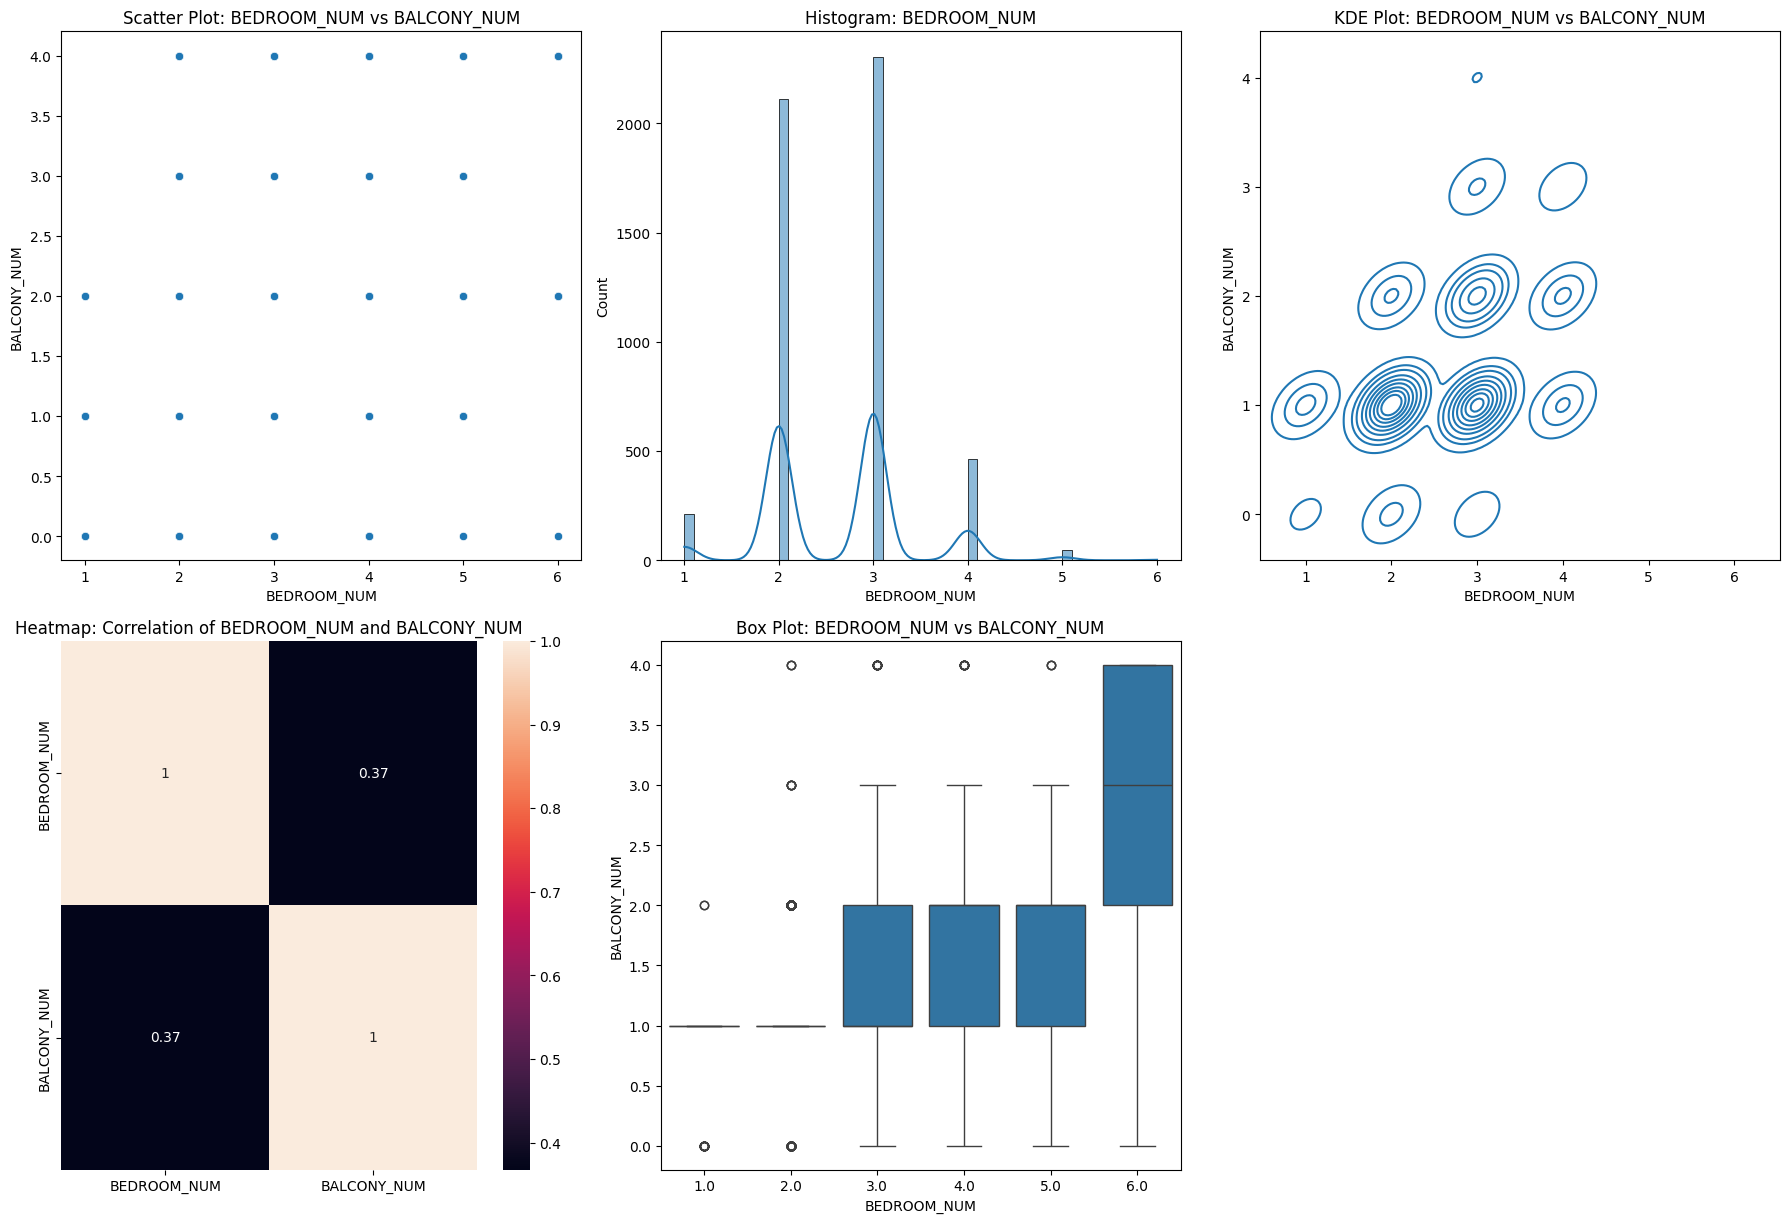

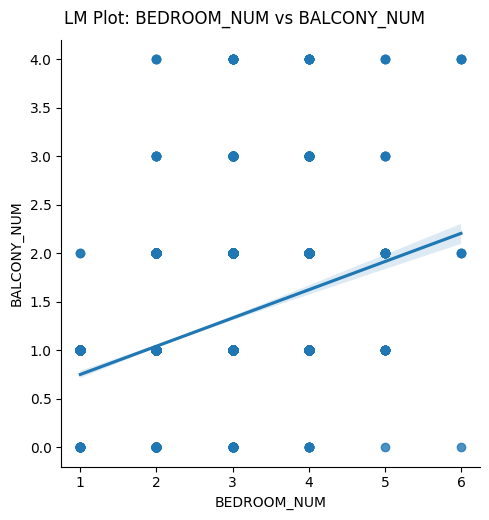

In [95]:
plot(df, 'BEDROOM_NUM','BALCONY_NUM',lmplot=True)

In [96]:

df_missing = df[df['BALCONY_NUM'].isna()]
df_not_missing = df[~df['BALCONY_NUM'].isna()]


X = df_not_missing[['BEDROOM_NUM']]
y = df_not_missing['BALCONY_NUM']


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

X_missing = df_missing[['BEDROOM_NUM']]
predictions = rf_model.predict(X_missing)

predictions = predictions.round()

df.loc[df['BALCONY_NUM'].isna(), 'BALCONY_NUM'] = predictions

In [97]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                    0
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                     0
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS      0
DESCRIPTION                     0
dtype: int64

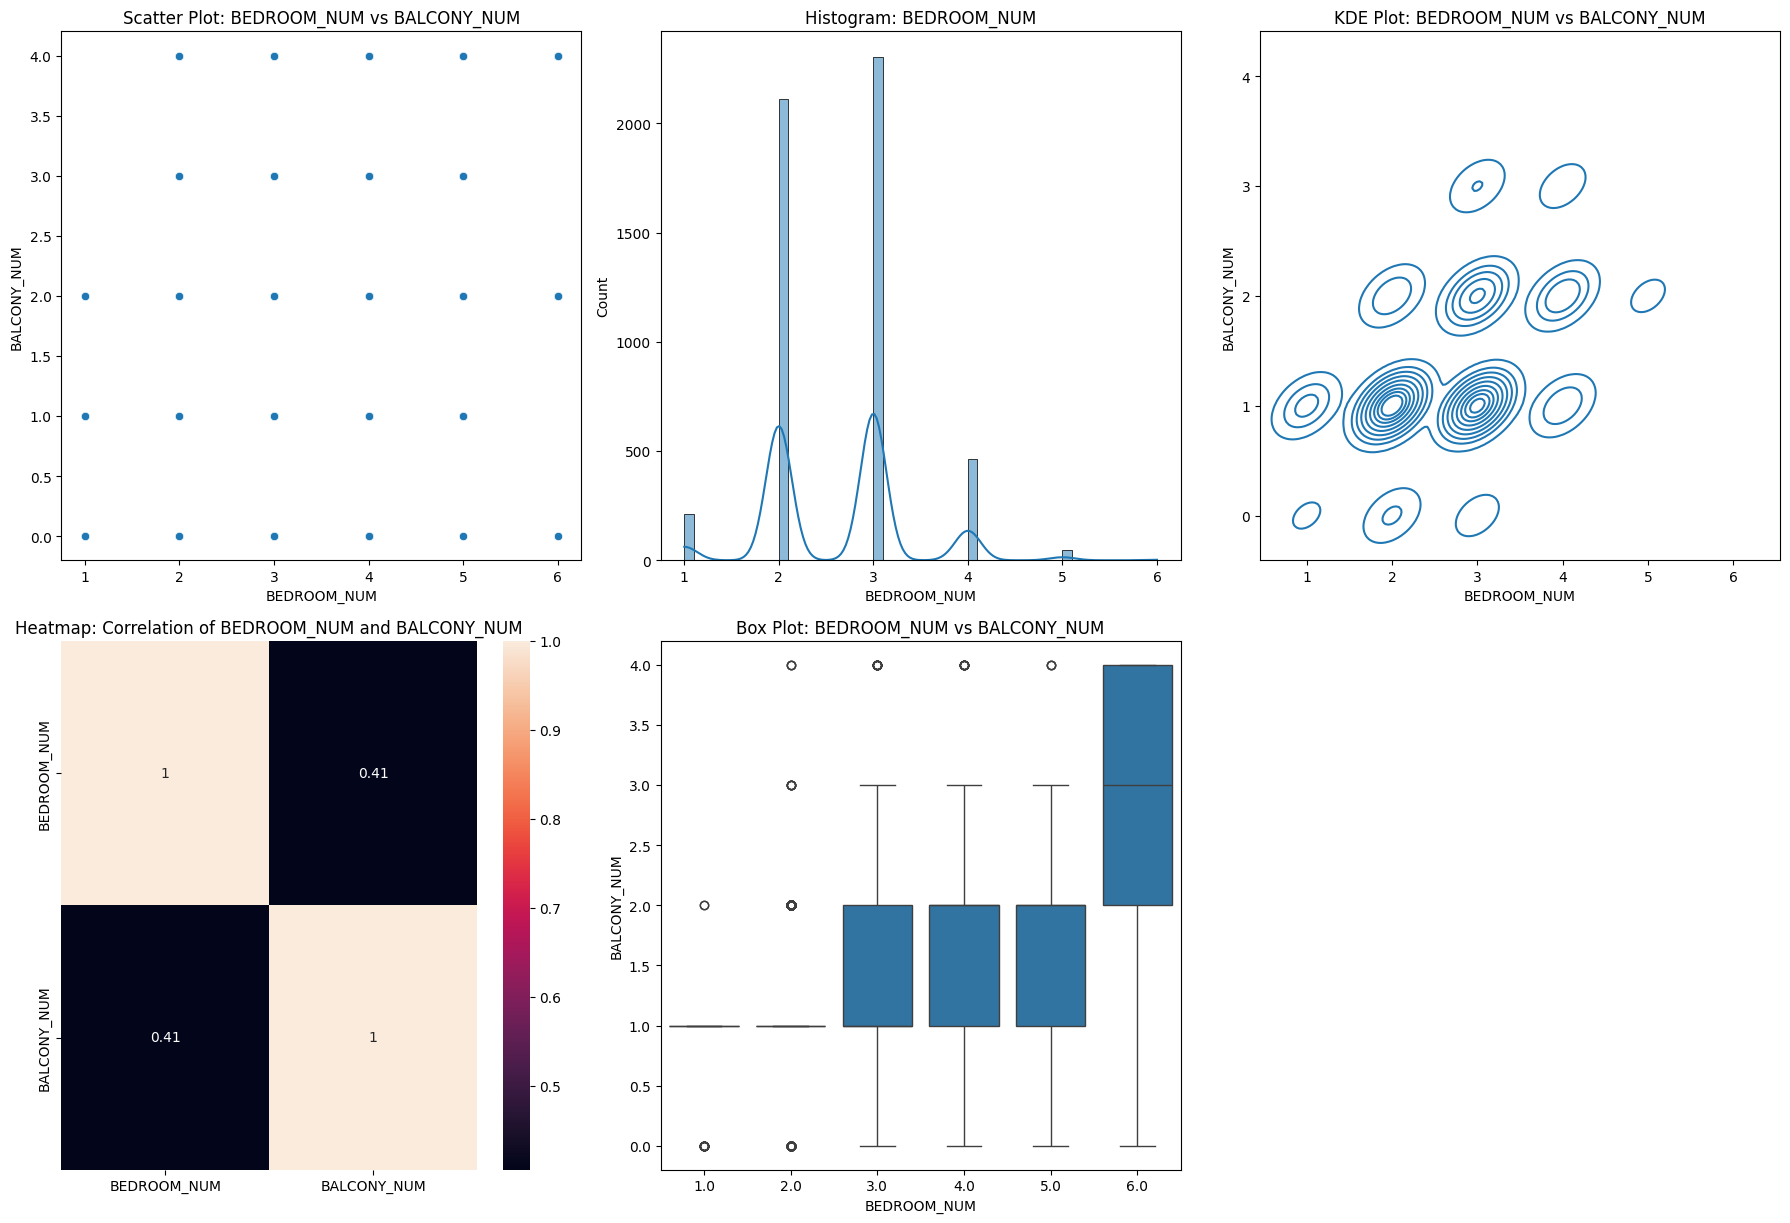

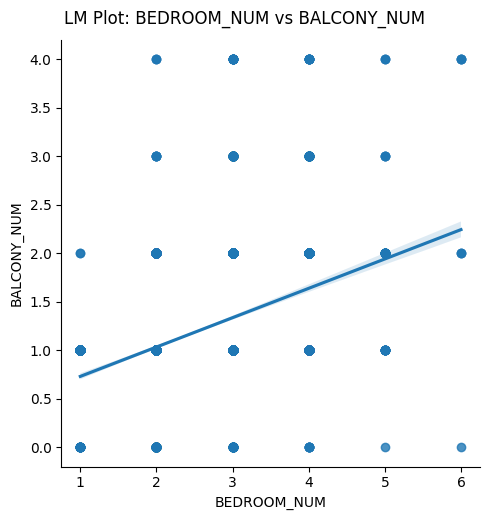

In [98]:
plot(df, 'BEDROOM_NUM','BALCONY_NUM',lmplot=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROP_ID                     5148 non-null   object 
 1   PROPERTY_TYPE               5148 non-null   object 
 2   SOCIETY_NAME                5148 non-null   object 
 3   CITY                        5148 non-null   object 
 4   location                    5148 non-null   object 
 5   BEDROOM_NUM                 5148 non-null   float64
 6   BALCONY_NUM                 5148 non-null   float64
 7   AREA                        5148 non-null   int64  
 8   Price_per_sqft              5148 non-null   float64
 9   PRICE                       5148 non-null   float64
 10  AGE                         5148 non-null   object 
 11  FACING                      5148 non-null   int64  
 12  FURNISH                     5148 non-null   object 
 13  amenity_luxury              4486 

In [100]:
# Filling amenity_luxury

In [101]:
df.isnull().sum()

PROP_ID                         0
PROPERTY_TYPE                   0
SOCIETY_NAME                    0
CITY                            0
location                        0
BEDROOM_NUM                     0
BALCONY_NUM                     0
AREA                            0
Price_per_sqft                  0
PRICE                           0
AGE                             0
FACING                          0
FURNISH                         0
amenity_luxury                662
FLOOR_NUM                       0
LATITUDE                        0
LONGITUDE                       0
TOTAL_FLOOR                     0
FORMATTED_LANDMARK_DETAILS      0
DESCRIPTION                     0
dtype: int64

In [102]:
df['amenity_luxury'].mode()

0    246.0
Name: amenity_luxury, dtype: float64

In [103]:
df[df['amenity_luxury']== 246].shape

(123, 20)

In [104]:
df['amenity_luxury'] = df['amenity_luxury'].apply(lambda x: 246 if pd.isna(x) else x)

In [105]:
df.isnull().sum()

PROP_ID                       0
PROPERTY_TYPE                 0
SOCIETY_NAME                  0
CITY                          0
location                      0
BEDROOM_NUM                   0
BALCONY_NUM                   0
AREA                          0
Price_per_sqft                0
PRICE                         0
AGE                           0
FACING                        0
FURNISH                       0
amenity_luxury                0
FLOOR_NUM                     0
LATITUDE                      0
LONGITUDE                     0
TOTAL_FLOOR                   0
FORMATTED_LANDMARK_DETAILS    0
DESCRIPTION                   0
dtype: int64

In [106]:
df.shape

(5148, 20)

In [110]:
#df.to_csv('final_dataset_for_universal_purpose.csv',index=False)

In [109]:
df

,PROP_ID,PROPERTY_TYPE,SOCIETY_NAME,CITY,location,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,PRICE,AGE,FACING,FURNISH,amenity_luxury,FLOOR_NUM,LATITUDE,LONGITUDE,TOTAL_FLOOR,FORMATTED_LANDMARK_DETAILS,DESCRIPTION
0,J71214794,flat,Bhawani bandhan,Kolkata North,Madhyamgram,2.0,1.0,920,4239.0,0.39,Old Property,0,Unfurnished,246.0,1,22.690003,88.459080,11.0,"['5 Religious Places', '15 Hospitals', '1 Attr...",Experience a new style of living with Bhawani ...
1,F70835394,flat,Ganguly 4sight desire,Kolkata South,Garia,1.0,1.0,535,5100.0,0.27,Old Property,0,Unfurnished,246.0,1,22.468780,88.380720,7.0,"['3 Metro Stations', '9 Religious Places', '3 ...",Let your dream of owning a flat come true with...
2,P69854924,flat,Dtc capital city,Kolkata East,Rajarhat,4.0,2.0,1940,4742.0,0.92,Old Property,0,Unfurnished,246.0,1,22.562087,88.505528,20.0,"['1 Shopping', '1 Education', '1 Hospital', '1...","Book your 4 BHK apartment in DTC Capital City,..."
3,E69854912,flat,Dtc capital city,Kolkata East,Rajarhat,2.0,1.0,910,4615.0,0.42,Old Property,0,Unfurnished,246.0,1,22.562087,88.505528,20.0,"['1 Shopping', '1 Education', '1 Hospital', '1...",Make DTC Capital City your next home. Book you...
4,R69167152,flat,Sai sarovaar,Kolkata East,New Town,3.0,1.0,1163,4700.0,0.55,Old Property,0,Unfurnished,246.0,1,22.570830,88.483880,4.0,"['1 Metro Station', '1 Religious Place', '1 AT...",Book a spectacular property in Sai Sarovaar th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,U71217472,flat,Shyama apartment,Kolkata South,Behala,2.0,1.0,730,4520.0,0.33,Relatively New Property,8,Fully furnished,307.0,2,22.497809,88.309352,2.0,"['1 Shopping', '8 Religious Places', '4 ATMs',...",There is no brokerage charges for this propert...
5144,E64737128,flat,Privet,Kolkata South,New Alipore,3.0,1.0,2000,9000.0,1.80,Moderately Old,7,Luxury furnished,192.0,2,22.514358,88.325146,5.0,"['1 Shopping', '5 Religious Places', '5 ATMs',...","This beautiful 3 bhk flat in new alipore, kolk..."
5145,J66826540,flat,Ambuja upohar the condoville,Kolkata South,Chak Garia,3.0,2.0,1843,8410.0,1.55,New Property,7,Luxury furnished,135.0,14,22.485966,88.396453,19.0,"['1 Metro Station', '14 Religious Places', '3 ...",Ambuja upohar the condoville is one of the mos...
5146,E66826562,flat,Ambuja upohar the condoville,Kolkata South,Chak Garia,3.0,2.0,2079,8417.0,1.75,New Property,7,Luxury furnished,135.0,10,22.485966,88.396453,19.0,"['1 Metro Station', '14 Religious Places', '3 ...",Looking for a 3 bhk property for sale in kolka...


<Axes: xlabel='FACING', ylabel='Price_per_sqft'>

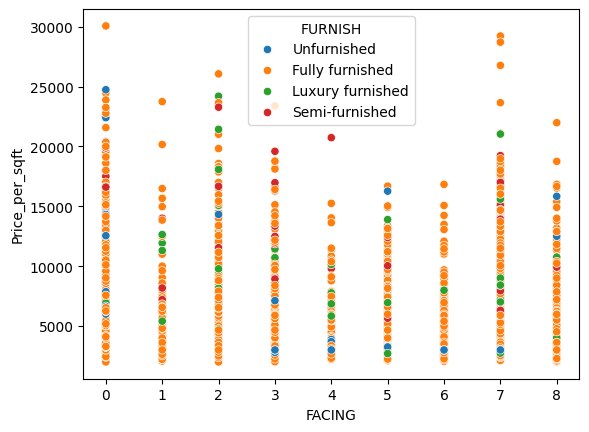

In [111]:
sns.scatterplot(df,x = 'FACING', y = 'Price_per_sqft',hue='FURNISH')
# as there is no clarificatopn of direction of facing, i am dropping it

In [112]:
df.drop(columns=['FACING','CITY','LATITUDE','LONGITUDE','FORMATTED_LANDMARK_DETAILS','DESCRIPTION'],inplace= True)

In [113]:
df

,PROP_ID,PROPERTY_TYPE,SOCIETY_NAME,location,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,PRICE,AGE,FURNISH,amenity_luxury,FLOOR_NUM,TOTAL_FLOOR
0,J71214794,flat,Bhawani bandhan,Madhyamgram,2.0,1.0,920,4239.0,0.39,Old Property,Unfurnished,246.0,1,11.0
1,F70835394,flat,Ganguly 4sight desire,Garia,1.0,1.0,535,5100.0,0.27,Old Property,Unfurnished,246.0,1,7.0
2,P69854924,flat,Dtc capital city,Rajarhat,4.0,2.0,1940,4742.0,0.92,Old Property,Unfurnished,246.0,1,20.0
3,E69854912,flat,Dtc capital city,Rajarhat,2.0,1.0,910,4615.0,0.42,Old Property,Unfurnished,246.0,1,20.0
4,R69167152,flat,Sai sarovaar,New Town,3.0,1.0,1163,4700.0,0.55,Old Property,Unfurnished,246.0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,U71217472,flat,Shyama apartment,Behala,2.0,1.0,730,4520.0,0.33,Relatively New Property,Fully furnished,307.0,2,2.0
5144,E64737128,flat,Privet,New Alipore,3.0,1.0,2000,9000.0,1.80,Moderately Old,Luxury furnished,192.0,2,5.0
5145,J66826540,flat,Ambuja upohar the condoville,Chak Garia,3.0,2.0,1843,8410.0,1.55,New Property,Luxury furnished,135.0,14,19.0
5146,E66826562,flat,Ambuja upohar the condoville,Chak Garia,3.0,2.0,2079,8417.0,1.75,New Property,Luxury furnished,135.0,10,19.0


In [114]:
#df.to_csv('ml_data.csv', index= False)